In [3]:
import yfinance as yf
from ta import momentum, trend
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
previes_days = 60
ticker = yf.Ticker("^NSEBANK")
# ticker = yf.Ticker("^NSEI")
df = ticker.history(period=f"2d", interval="15m")

df.reset_index(inplace=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3

# Calculate technical indicators
df['5EMA'] = trend.EMAIndicator(df['Close'], window=5).ema_indicator()
# df['RSI'] = momentum.RSIIndicator(df['Close'], window=3).rsi()
df = df.drop(columns = ['Dividends','Stock Splits','Open','Close','High','Low','Datetime','Volume'])
df = df.dropna()

In [5]:
df

,Date,Time,Pivot,5EMA
4,2023-12-19,10:15:00,47696.566406,47713.585503
5,2023-12-19,10:30:00,47746.333333,47723.540075
6,2023-12-19,10:45:00,47743.634115,47726.360050
7,2023-12-19,11:00:00,47747.183594,47734.107221
8,2023-12-19,11:15:00,47755.983073,47748.120960
9,2023-12-19,11:30:00,47824.882812,47782.063713
10,2023-12-19,11:45:00,47902.015625,47828.608881
11,2023-12-19,12:00:00,47894.166667,47847.305661
12,2023-12-19,12:15:00,47913.316406,47870.336586
13,2023-12-19,12:30:00,47921.933594,47889.474391


In [6]:
def find_turning_points_with_gap(data, gap_threshold=3):
    turning_points = []

    # Initialize counters for increasing and decreasing sequences
    inc_count = 0
    dec_count = 0

    # Initialize variables to store the potential turning point indices
    potential_inc_turning_point = None
    potential_dec_turning_point = None

    # Iterate through the data
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:  # Increasing order
            inc_count += 1
            dec_count = 0  # Reset decreasing count

            # Update potential turning point for increasing order
            potential_inc_turning_point = i
        elif data[i] < data[i - 1]:  # Decreasing order
            dec_count += 1
            inc_count = 0  # Reset increasing count

            # Update potential turning point for decreasing order
            potential_dec_turning_point = i
        else:  # Equal values, reset both counts
            inc_count = 0
            dec_count = 0

        # Check if a turning point is found based on the gap threshold
        if inc_count >= 3 and potential_dec_turning_point is not None and (i - potential_dec_turning_point) >= gap_threshold:
            turning_points.append(potential_dec_turning_point)
            potential_dec_turning_point = None
        elif dec_count >= 3 and potential_inc_turning_point is not None and (i - potential_inc_turning_point) >= gap_threshold:
            turning_points.append(potential_inc_turning_point)
            potential_inc_turning_point = None
    
    return turning_points

# data = df.Pivot.tolist()
data = df['5EMA'].tolist()
result = find_turning_points_with_gap(data)

# # Display the result
# print("Turning points indices:", result)
# turning_points = [data[i] for i in result]
# print("Turning points:", turning_points)


In [7]:
# np_data = np.array(result, dtype=np.int64)

In [8]:
# df.loc[np_data, ['Date', 'Time']]

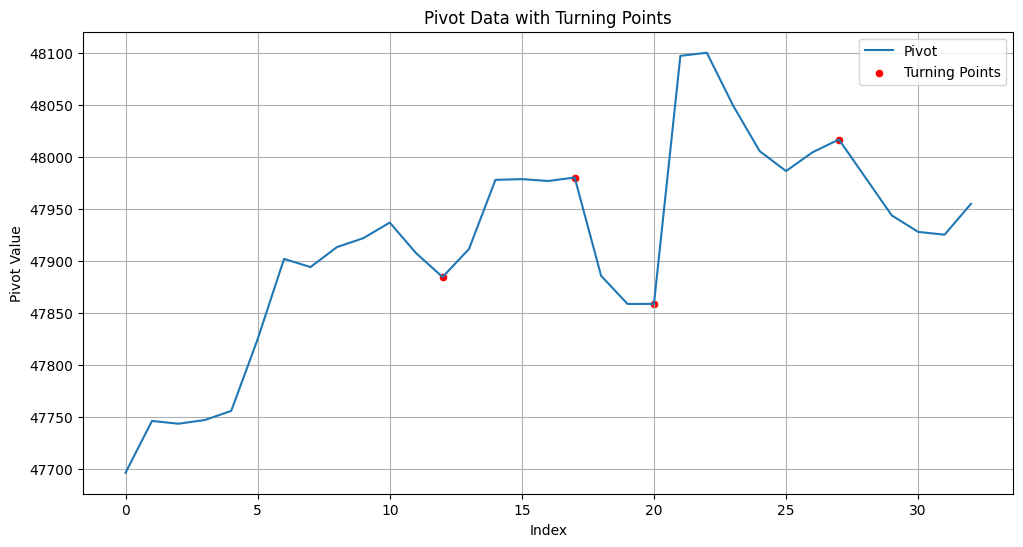

In [9]:


# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(df)), y=df['Pivot'], label='Pivot')

# Add step line at specified indices
sns.scatterplot(x=result, y=df['Pivot'].iloc[result], color='red', marker='o', label='Turning Points')

# Customize the plot
plt.title('Pivot Data with Turning Points')
plt.xlabel('Index')
plt.ylabel('Pivot Value')
plt.legend()
plt.grid(True)
plt.show()